In [1]:
import random 
import numpy as np 
from deap import base, creator, tools, algorithms 

import matplotlib.pyplot as plt 

In [2]:
seed = 42
N = 50

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [4]:
def evaluate(individual): 
    return (sum(individual),)
   

In [5]:
toolbox = base.Toolbox() 

toolbox.register("attr_binary", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_binary, n=N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate) 
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [28]:
random.seed(seed)

pop = toolbox.population(n=30)
hof = tools.HallOfFame(1) 

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda vals: round(np.mean([v[0] for v in vals]), 2))
stats.register("std", lambda vals: round(np.std([v[0] for v in vals]), 2))
stats.register("min", lambda vals: round(min(v[0] for v in vals), 2))
stats.register("max", lambda vals: round(max(v[0] for v in vals), 2))

population, logbook = algorithms.eaSimple(population=pop, 
                        toolbox=toolbox, 
                        cxpb=0.7, 
                        mutpb=0.3,
                        ngen=40, 
                        stats=stats, 
                        halloffame=hof,
                        verbose=True)

best = hof[0] 
print(f"Hall of Fame (HOF) Best Individual:  {best}")
print(f"Hall of Fame Fitness: {hof[0].fitness.values}")

gen	nevals	avg  	std 	min	max
0  	30    	25.73	4.04	17 	33 
1  	28    	29.83	2.57	26 	36 
2  	25    	32.17	2   	27 	36 
3  	23    	33.97	1.62	29 	37 
4  	21    	35.2 	1.9 	31 	40 
5  	25    	36.3 	1.37	32 	38 
6  	24    	36.67	1.78	33 	40 
7  	26    	37.67	1.96	33 	42 
8  	25    	39.1 	1.64	35 	42 
9  	28    	39.73	1.73	36 	42 
10 	19    	40.33	1.49	37 	42 
11 	25    	40.7 	1.44	38 	43 
12 	19    	41.4 	1.11	39 	43 
13 	25    	41.7 	1.32	37 	44 
14 	26    	41.57	1.93	36 	45 
15 	26    	42.67	1.47	39 	46 
16 	17    	43.7 	1.24	41 	46 
17 	19    	44.07	1.48	40 	46 
18 	22    	44.67	1.68	39 	47 
19 	25    	45.13	1.5 	41 	48 
20 	22    	45.53	1.91	40 	48 
21 	25    	46.37	1.4 	41 	48 
22 	23    	46.9 	1.16	43 	48 
23 	19    	46.83	1.51	43 	48 
24 	23    	47.5 	0.92	44 	48 
25 	26    	47.23	1.54	42 	48 
26 	23    	47.17	1.27	44 	48 
27 	25    	47.03	1.43	43 	48 
28 	19    	47.17	1.39	43 	48 
29 	25    	47.3 	1.24	44 	48 
30 	25    	47.13	1.36	44 	48 
31 	23    	46.8 	1.62	42 	48 
32 	27    

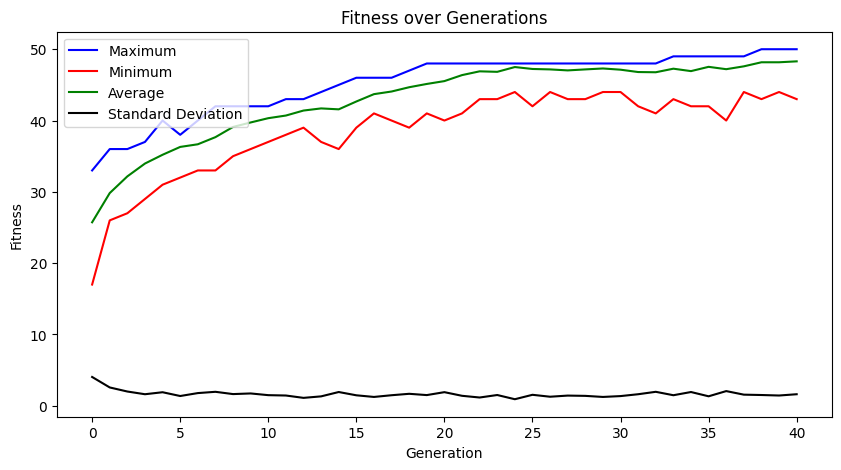

In [29]:
plt.figure(figsize=(10, 5)) 
gen = logbook.select("gen")
fit_mins = logbook.select("min")
fit_maxs = logbook.select("max")
fit_avgs = logbook.select("avg")
fit_stds = logbook.select("std")  

plt.plot(gen, fit_maxs, "b-", label="Maximum")
plt.plot(gen, fit_mins, "r-", label="Minimum")
plt.plot(gen, fit_avgs, "g-", label="Average")
plt.plot(gen, fit_stds, "k-", label="Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper left")
plt.title("Fitness over Generations")
plt.show()